In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train) , (x_test, y_test) = cifar10.load_data()

In [4]:
x_train.shape , x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
## Scaling
x_train = x_train/255
x_test = x_test/255

In [6]:
x_train.max() , x_test.min()

(1.0, 0.0)

In [7]:
from tensorflow.keras.utils import to_categorical

## Convert to Categorical values
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [8]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

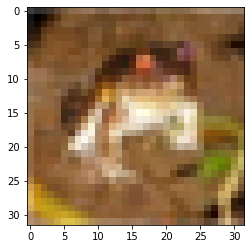

In [9]:
plt.imshow(x_train[0]);

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D , Flatten , MaxPool2D

In [11]:
x_train.shape , y_cat_train.shape

((50000, 32, 32, 3), (50000, 10))

In [12]:
x_test.shape , y_cat_test.shape

((10000, 32, 32, 3), (10000, 10))

In [13]:
32* 32*2

2048

In [14]:
model = Sequential()

#Convolutional Layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3), activation="relu" ))
##Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

#Convolutional Layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3), activation="relu" ))
##Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

#Flattening the images
model.add(Flatten())

#Adding dense neuron layers
model.add(Dense(256, activation="relu"))

##Output Layer
model.add(Dense(10,activation="softmax"))

#Compile
model.compile(optimizer='adam', loss= 'categorical_crossentropy',metrics=['accuracy'])

In [15]:
## Early Stopping

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [16]:
model.fit(x_train , y_cat_train , epochs=15,validation_data=(x_test , y_cat_test),callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 157s 3ms/sample - loss: 1.5080 - accuracy: 0.4522 - val_loss: 1.2482 - val_accuracy: 0.5492
Epoch 2/15
50000/50000 [==============================] - 87s 2ms/sample - loss: 1.1999 - accuracy: 0.5745 - val_loss: 1.1094 - val_accuracy: 0.6062
Epoch 3/15
50000/50000 [==============================] - 86s 2ms/sample - loss: 1.0649 - accuracy: 0.6243 - val_loss: 1.0514 - val_accuracy: 0.6256
Epoch 4/15
50000/50000 [==============================] - 86s 2ms/sample - loss: 0.9556 - accuracy: 0.6639 - val_loss: 1.0822 - val_accuracy: 0.6212
Epoch 5/15
50000/50000 [==============================] - 85s 2ms/sample - loss: 0.8719 - accuracy: 0.6921 - val_loss: 1.0033 - val_accuracy: 0.6528
Epoch 6/15
50000/50000 [==============================] - 85s 2ms/sample - loss: 0.7949 - accuracy: 0.7201 - val_loss: 1.0080 - val_accuracy: 0.6564
Epoch 7/15
50000/50000 [==============================]

In [17]:
metrics = pd.DataFrame(model.history.history)

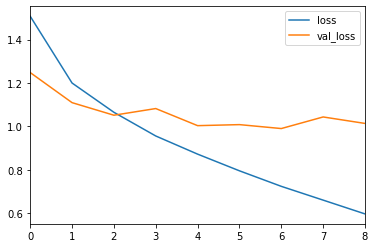

In [18]:
metrics[['loss','val_loss']].plot();

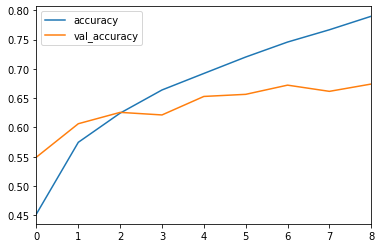

In [19]:
metrics[['accuracy','val_accuracy']].plot();

In [20]:
y_predictions = model.predict_classes(x_test)

In [21]:
y_predictions

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
confusion_matrix(y_test , y_predictions)

array([[768,  20,  50,  12,  18,  10,  20,   8,  68,  26],
       [ 42, 789,   6,   8,   1,   8,  12,   5,  62,  67],
       [ 79,  13, 569,  72,  71,  64,  70,  27,  22,  13],
       [ 30,  11,  95, 484,  67, 154,  69,  43,  29,  18],
       [ 34,   7, 111,  53, 591,  52,  58,  71,  20,   3],
       [ 24,   3,  75, 204,  50, 554,  28,  38,  11,  13],
       [ 14,   6,  49,  65,  33,  31, 772,   8,  16,   6],
       [ 28,   5,  45,  51,  51,  67,   6, 718,   8,  21],
       [106,  26,  19,  11,   6,   8,   6,   5, 792,  21],
       [ 50, 100,  14,  27,   2,   3,   8,  34,  59, 703]], dtype=int64)

In [24]:
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.65      0.77      0.71      1000
           1       0.81      0.79      0.80      1000
           2       0.55      0.57      0.56      1000
           3       0.49      0.48      0.49      1000
           4       0.66      0.59      0.63      1000
           5       0.58      0.55      0.57      1000
           6       0.74      0.77      0.75      1000
           7       0.75      0.72      0.73      1000
           8       0.73      0.79      0.76      1000
           9       0.79      0.70      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [25]:
sample_example = x_test[0]

In [26]:
y_test[0]

array([3], dtype=uint8)

In [27]:
model.predict_classes(sample_example.reshape(1,32,32,3))

array([3], dtype=int64)